# Intrinsieke camera kalibratie


> In dit script gaan we de camera kalibreren. Dit wil zeggen dat we opzoek zijn naar de intrinsieke camera matrix. Deze matrix zet metrische coördinaten (X, Y, Z) in het cameraframe {C} om in pixelcoördinaten (u, v). We kunnen dit schrijven in matrix notatie:

$$\begin{bmatrix} u'\\ v' \\ w' \end{bmatrix} = \begin{bmatrix} f_{x} & 0 & u_{0} \\ 0 & f_{y} & v_{0} \\ 0 & 0 & 1 \end{bmatrix}*\begin{bmatrix} X\\ Y \\ Z \end{bmatrix}$$ 

> Waarbij w' een schaal factor is en de werkelijke pixelcoördinaten kunnen worden voorgesteld door: $u = \frac{u'}{w'}$ en $v = \frac{v'}{w'}$. Als we dit stelsel uitschrijven dan zien we inderdaad dat :
$$u'=f_{x}*X + u_{0}*Z$$
$$v'=f_{y}*Y + v_{0}*Z$$

> En dus:
$$u=\frac{f_{x}*X}{Z} + u_{0}$$
$$v=\frac{f_{y}*Y}{Z} + v_{0}$$

> We zien dus inderdaad dat als we het metrische coördinaat van een punt beschreven in cameraframe (X, Y, Z) kennen, dat we het overeenkomstige pixelcoördinaat (u,v) kunnen bepalen. Om de ongekende parameters van de intrinsieke camera matrix te kunnen bepalen hebben we dus een set van punten nodig waarvan we de metrische coördinaten kennen alsook de overeenkomstige pixelcoördinaten. Als we zo genoeg bekenden kunnen genereren kunnen we deze gebruiken om uit het stelsel de onbekenden op te lossen. Om dit te doen maken we gebruik van een dambordpatroon waar we de exacte afmetingen van kennen. Op dit dambordpatroon definiëren we een assenstelsel met x-, y-, en z-as. We definiëren voor elk van de hoekpunten een metrisch coördinaat. De vakjes van het patroon in de afbeeldingen zijn exact 0.02m breed. Het coördinaat van de oorsprong kan dus gekozen worden als zijnde (X, Y, Z) = (0, 0, 0), en het eerste coördinaat langs de x-as als (X, Y, Z) = (0.02, 0, 0) en langs de y-as als (X, Y, Z) = (0, 0.02, 0). We kiezen hier z altijd 0.









# 1. Importeer biliotheken


> Deze bibliotheken zijn nodig voor het volbrengen van dit script. In de CameraCalibration bibliotheek vind je de code achter de commando's die je hier zal gebruiken. 




In [ ]:
import sys
sys.path.append('/content/drive/My Drive/object_pose_estimation_online')
from Classes.CameraCalibration import *
from google.colab.patches import cv2_imshow

# 2. Importeer alle beelden voor camera kalibratie

> Voor de camera kalibratie hebben we beelden nodig van een kalibratietool, in dit geval een dambordpatroon van 7x7. Alle afbeeldingen bevinden zich onder de map /content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images. Met de asteriks wordt aangegeven dat uit deze map alle afbeelingen startende met "CC_image_original_" bedoeld worden. De methode "get_image_path_names" geeft alle aparte bestandsnamen terug en slaat deze op in "images_path_names". Als je dit uitprint kan je zien dat dit een array is met alle 10 de padnamen naar elke afbeelding. 



In [ ]:
# Get all image's path names
camera_calibration_images_file = '/content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images/CC_image_original_*.jpg'
images_path_names = get_image_path_names(camera_calibration_images_file)
print(images_path_names)

['/content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images/CC_image_original_1.jpg', '/content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images/CC_image_original_10.jpg', '/content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images/CC_image_original_2.jpg', '/content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images/CC_image_original_3.jpg', '/content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images/CC_image_original_4.jpg', '/content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images/CC_image_original_5.jpg', '/content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images/CC_image_original_6.jpg', '/content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images/CC_image_original_7.jpg', '/content/drive/My Drive/object_pose_estimation_online/data/camera_calibration_images/CC_image_origina



> Als we een afbeelding willen weergeven kunnen we daar de volgende code voor gebruiken. Deze neemt de 1e afbeelding (Python indexeert vanaf 0 en doet dit met vierkante haakjes). We lezen het beeld uit met "read_image" en plotten deze met "cv2_imshow()".



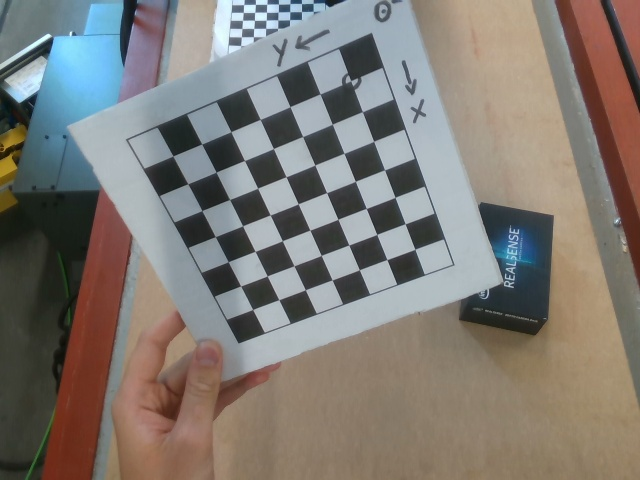

In [ ]:
# Preview image
image_path = images_path_names[0]
image = read_image(image_path)
cv2_imshow(image)

# 3. Testen van het Corner detection algoritme


> Voor de camera kalibratie dienen we de exacte pixelcoördinaten te kennen van alle 49 hoekpunten in het patroon, er wordt meegegeven dat we naar een 7x7 patroon zoeken. 



In [ ]:
# Define chessboard pattern to search for
pattern = (7, 7)



> We zetten de afbeelding om naar grayscale, dit wordt gedaan om data te reduceren (van 3 RGB arrays naar 1 gray array). 



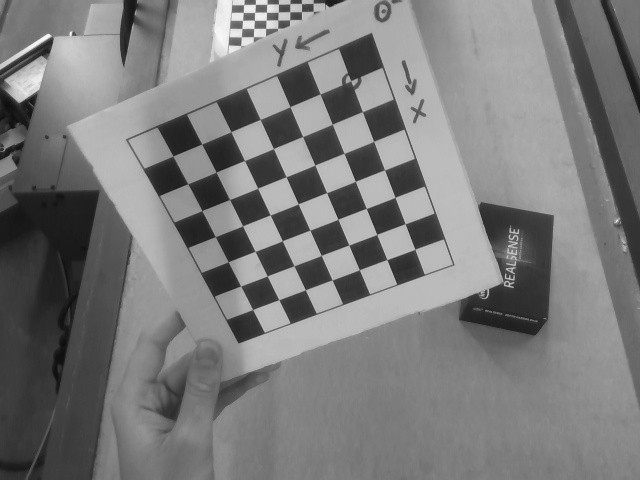

In [ ]:
# Convert RGB image to grayscale
gray = image_to_grayscale(image)
cv2_imshow(gray)



> De functie "find_corners" geeft ons alle 49 pixel coördinaten (u, v) van elke zwart-zwart overgang in het patroon. Je kan deze uitprinten.



In [ ]:
# Find the chess board corners in the image
corners = find_corners(gray)
print(corners)

[[[350.85303  80.71994]]

 [[362.38293 111.66346]]

 [[373.69077 141.3312 ]]

 [[384.52664 169.8097 ]]

 [[395.0936  197.32944]]

 [[405.17935 223.74205]]

 [[414.94226 249.29697]]

 [[320.03033  93.92397]]

 [[332.33655 124.17677]]

 [[343.94308 153.3439 ]]

 [[355.36948 181.34834]]

 [[366.2456  208.416  ]]

 [[376.74765 234.45723]]

 [[386.84277 259.60278]]

 [[289.994   106.62779]]

 [[302.62076 136.50134]]

 [[314.87167 164.99176]]

 [[326.5787  192.62944]]

 [[338.00763 219.27812]]

 [[348.77466 245.02013]]

 [[359.35123 269.74426]]

 [[260.19232 119.36451]]

 [[273.40265 148.53867]]

 [[285.98547 176.71492]]

 [[298.23126 203.79134]]

 [[309.82687 230.15948]]

 [[321.2377  255.39813]]

 [[332.11673 279.91434]]

 [[230.9542  131.71977]]

 [[244.44098 160.48102]]

 [[257.6543  188.23181]]

 [[270.20966 214.9259 ]]

 [[282.3281  240.7055 ]]

 [[293.93585 265.788  ]]

 [[305.3419  289.7488 ]]

 [[201.67403 143.95078]]

 [[216.14352 172.15233]]

 [[229.48376 199.44432]]

 [[242.59944



> De gedetecteerde hoeken kunnen worden gevisualiseerd op de afbeelding met de functie "drawChessboardCorners" van de cv2 bibliotheek. De kleuren geven aan in welke volgorde de hoeken zijn gedetecteerd en dus ook opgeslagen in de array. Het eerste rode hoekpunt wordt als eerste opgeslagen en het laatse violette hoekpunt als laatste. 



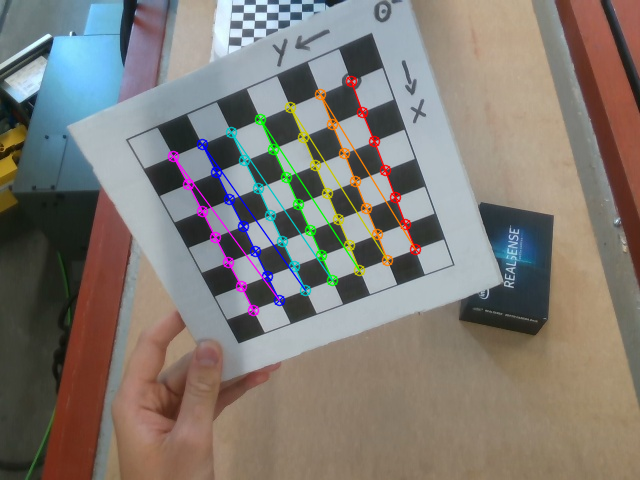

In [ ]:
# Show detected corners
imgage = cv2.drawChessboardCorners(image, pattern, corners, True)
cv2_imshow(image)

#4. Voorbereiding van de camera kalibratie met  10 afbeeldingen


> Bij camera kalibratie willen we alle 9 parameters van de intrinsieke camera matrix berekenen. Om voldoende data te hebben gebruiken we 10 afbeeldingen waarbij we telkens de pixelcoördinaten (u, v) van de hoekpunten bepalen en deze opslaan met de overeenkomstige wereldcoördinaten (X, Y, Z). Deze wereldcoördinaten definiëren we manueel. We zeggen bijvoorbeeld dat het eerste hoepkpunt dat het algoritme detecteert (rood) overeenkomt met werledcoördinaat (X, Y, Z) = (0, 0, 0). We definiëren het tweede rode hoekpunt dat het algoritme detecteert als liggende langs de x-as en geven dit dus het werledcoördinaat (X, Y, Z) = (0.02, 0, 0). De functie "get_object_points" geeft ons al deze coördinaten, je kan deze uitprinten. 



In [ ]:
# Get user defined world coordinates
objp = get_object_points()
print(objp)

[[0.   0.   0.  ]
 [0.02 0.   0.  ]
 [0.04 0.   0.  ]
 [0.06 0.   0.  ]
 [0.08 0.   0.  ]
 [0.1  0.   0.  ]
 [0.12 0.   0.  ]
 [0.   0.02 0.  ]
 [0.02 0.02 0.  ]
 [0.04 0.02 0.  ]
 [0.06 0.02 0.  ]
 [0.08 0.02 0.  ]
 [0.1  0.02 0.  ]
 [0.12 0.02 0.  ]
 [0.   0.04 0.  ]
 [0.02 0.04 0.  ]
 [0.04 0.04 0.  ]
 [0.06 0.04 0.  ]
 [0.08 0.04 0.  ]
 [0.1  0.04 0.  ]
 [0.12 0.04 0.  ]
 [0.   0.06 0.  ]
 [0.02 0.06 0.  ]
 [0.04 0.06 0.  ]
 [0.06 0.06 0.  ]
 [0.08 0.06 0.  ]
 [0.1  0.06 0.  ]
 [0.12 0.06 0.  ]
 [0.   0.08 0.  ]
 [0.02 0.08 0.  ]
 [0.04 0.08 0.  ]
 [0.06 0.08 0.  ]
 [0.08 0.08 0.  ]
 [0.1  0.08 0.  ]
 [0.12 0.08 0.  ]
 [0.   0.1  0.  ]
 [0.02 0.1  0.  ]
 [0.04 0.1  0.  ]
 [0.06 0.1  0.  ]
 [0.08 0.1  0.  ]
 [0.1  0.1  0.  ]
 [0.12 0.1  0.  ]
 [0.   0.12 0.  ]
 [0.02 0.12 0.  ]
 [0.04 0.12 0.  ]
 [0.06 0.12 0.  ]
 [0.08 0.12 0.  ]
 [0.1  0.12 0.  ]
 [0.12 0.12 0.  ]]




> In een for-loop worden alle hoekpunten van elke afbeelding gedetecteerd en gerelateerd aan de coördinaten in wereld frame (objpoints). Per afbeelding worden deze telkens opgelsagen in 1 grote arrar dewelke we hier initialiseren. 



In [ ]:
# Initialize empty arrays for world and pixel cooridnates
imgpoints = []
objpoints = []



> In deze for-loop zullen jullie de nodige code voorzien voor het uitlezen van een beeld, omzetten naar grayscale, detecteren van de hoekpunten, en opslaan van de hoekpunten in de imgpoints array alsook de wereldcoordinaten objp in de objpoints array. Zoek op Google op hoe je in Python een object toevoegt aan een array. 



In [ ]:
# Iterate over all images
for image_path in images_path_names:

    # Read image from file
    image = 

    # Convert RGB image to grayscale
    gray = 

    # Find the chess board corners in the image
    corners = 

    # Add object points to objpoints list
    

    # Add pixel coordinates to imgpoints list
    



> Eens de for-loop voorbij is, zouden de arrays een correcte inhoud moeten hebben. Namelijk een array objpoints met 10 maal een 49x3 array, zijnde de wereld coordinaten van de 49 hoekpunten in het patroon (10, 49, 3) en een array imgpoint met 10 maal een 49x2 array, zijnde de pixelcoordinaten van de 49 hoekpunten in het patroon (10, 49, 1, 2).



In [ ]:
# Check dimensions of arrays
print("Dimensions of world coordinate array: " + str(np.shape(objpoints)))
print("Dimensions of pixel coordinate array: " + str(np.shape(imgpoints)))

Dimensions of world coordinate array: (10, 49, 3)
Dimensions of pixel coordinate array: (10, 49, 1, 2)


# 5. Camera calibration


> Eens we de twee arrays hebben met de pixelcoördinaten en de overeenkomstige werledcoördinaten, kunnen we deze twee aan een functie "calibrate_camera" geven die voor ons de intrinsieke matrix zal bepalen. Deze wordt automatisch met de tevens berekende distortie coëfficienten uitgeprint. In de matrix kan je herkennen wat de brandpuntafstand in x- en y-richting is alsook de camera centerpunten $u_{0}$ en $v_{0}$. 



In [ ]:
# Calibrate camera and obtain intrinsic camera matrix using the objpoints list and the imgpoints list
intrinsic_camera_matrix = calibrate_camera(objpoints, imgpoints)


MTX (Intrinsic camera matrix): 

[[634.4409321    0.         268.83299123]
 [  0.         631.34698939 240.78230923]
 [  0.           0.           1.        ]]

DIST (Distortion coefficients): 

[[ 4.60276363e-02  6.72697619e-01  1.26592510e-04 -2.83711728e-02
  -2.84101740e+00]]




> Tot slot berekenen we nog de reprojection error. Hierbij zal een algoritme de berekende pixelcoördinaten, gebruik makende van je intrinsieke matrix, vergelijken met de pixelcoördinaten uit het corner detectie algoritme. Dit geeft een error die weergeeft hoe goed je kalibratie is. 



In [ ]:
# Calculate reprojection error
reprojection_error = calculate_reprojection_error(intrinsic_camera_matrix, objpoints, imgpoints)
print("\nTotal reprojection error: %f" % (reprojection_error / float(len(objpoints))))


Total reprojection error: 0.078738


# 6. Test camera calibration



> In wat volgt kunnen we de kalibratie testen. De intrinsieke matrix geeft ons namelijk weer welke pixel coördinaten overeenkomen met objecten gepositioneerd op een bepaalde locatie in het camera frame {C}. We kunnen dus coördinaten van een object die we virtueel plaatsen in het camera frame projecteren in pixel frame (dit is de basis van Augmented Reality). Hierbij laden we eerst terug onze berekende intrinsieke camera matrix.  



In [ ]:
# Load intrinsic camera matrix and distortion coefficients
intrinsic_camera_matrix_file = "/content/drive/My Drive/object_pose_estimation_online/data/matrix_files/intrinsic_camera_properties.npz"
mtx, dist = load_intrinsic_camera_matrix(intrinsic_camera_matrix_file)



> We definiëren twee zaken:


*   De coordinaten van het camera assenstelsel. We definiëren de oorsprong op (X, Y, Z) = (0, 0, 0) in het camera frame, de x-as op (X, Y, Z) = (0.6, 0, 0) , de y-as op (X, Y, Z) = (0, 0.6, 0), en de z-as op (X, Y, Z) = (0, 0, 0.6). 
*   De coördinaten van een virtueel vierkant van 0.04x0.04 meter in het camera frame. Eens op een afstand van 0.5 meter van de camera, 0.6 meter, en 1.7 meter.


> Voor deze beide zaken maken we gebruik van de intrinsieke matrix om te kijken met welke pixels deze overeenkomen. Als we deze pixels berekenen en projecteren op het beeld, dan krijgen we het effect alsof deze zaken zich werkelijk in de ruimte bevinden.







In [ ]:
# Define axis and box coordinates in camera coordinate system
axis = np.float32([[0.06, 0, 0], [0, 0.06, 0], [0, 0, 0.06], [0, 0, 0]])
square1 = np.float32([[0.08, 0.06, 0.5], [0.12, 0.06, 0.5], [0.12, 0.10, 0.5], [0.08, 0.10, 0.5]]).reshape(-1, 3)
square2 = np.float32([[0.08, 0.06, 0.6], [0.12, 0.06, 0.6], [0.12, 0.10, 0.6], [0.08, 0.10, 0.6]]).reshape(-1, 3)
square3 = np.float32([[0.08, 0.06, 1.7], [0.12, 0.06, 1.7], [0.12, 0.10, 1.7], [0.08, 0.10, 1.7]]).reshape(-1, 3)

In [ ]:
# Project 3D axis points to pixel coordinates
imgpts_axis, _ = cv2.projectPoints(axis, np.identity(3), np.zeros((3, 1)), mtx, dist)

# Draw axis on image
image = draw_axis(image, imgpts_axis)

# Project 3D box points to pixel coordinates
imgpts_square1, _ = cv2.projectPoints(square1, np.identity(3), np.zeros((3, 1)), mtx, dist)

# Project 3D box points to pixel coordinates
imgpts_square2, _ = cv2.projectPoints(square2, np.identity(3), np.zeros((3, 1)), mtx, dist)

# Project 3D box points to pixel coordinates
imgpts_square3, _ = cv2.projectPoints(square3, np.identity(3), np.zeros((3, 1)), mtx, dist)

# Draw square on image
image = draw_square(image, imgpts_square1)

# Draw square on image
image = draw_square(image, imgpts_square2)

# Draw square on image
image = draw_square(image, imgpts_square3)

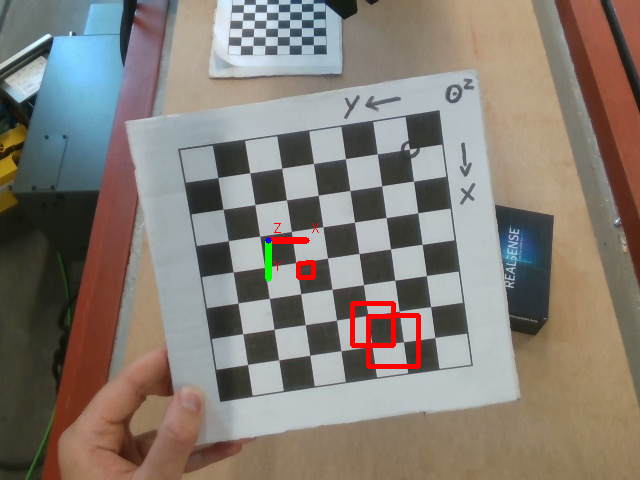

In [ ]:
# Show result
cv2_imshow(image)